# Logistic Regression

## Goal:
Classificate student attendance based on two exams scores.

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support
from mpl_toolkits.mplot3d import Axes3D
import math

# do ploting inline instead of in a separate window
%matplotlib inline

In [2]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib, mpl_toolkits

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
mpl_toolkits The 'mpl_toolkits' distribution was not found and is required by the application
Mon Feb 06 10:14:09 2017 EET

In [3]:
data = pd.read_csv("./data/exam-scores(exam1_exam2_admitted).txt", names=['exam1', 'exam2', 'admitted'], header=None)

In [4]:
data.head(5)

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.tail(5)

,exam1,exam2,admitted
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


## Initial Data Visualizaion

In [6]:
admitted = data.loc[data['admitted'] == 1]
not_admitted = data.loc[data['admitted'] == 0]
print('Number of admitted students: {}'.format(len(admitted)))
print('Number of not admitted students: {}'.format(len(not_admitted)))

Number of admitted students: 60
Number of not admitted students: 40


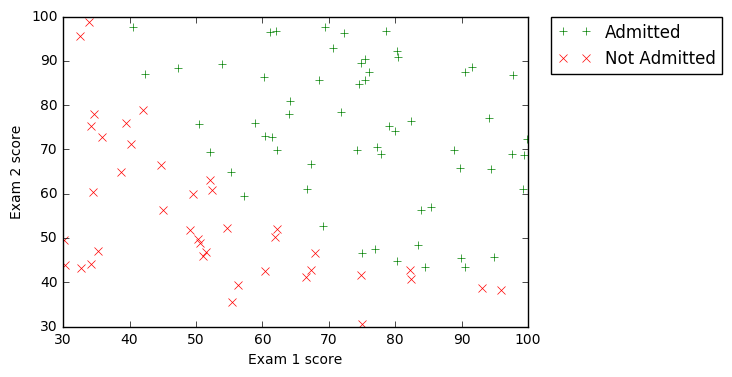

In [7]:
plt.figure()
plt.plot(admitted['exam1'].values, admitted['exam2'].values, 'g+', label='Admitted')
plt.plot(not_admitted['exam1'].values, not_admitted['exam2'].values, 'rx', label='Not Admitted')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

## Cost Function:

In [8]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [9]:
X = data[['exam1', 'exam2']]
X['_bias'] = 1
X = X[['_bias', 'exam1', 'exam2']].values
y = data[['admitted']].values[:, 0]

In [10]:
def costFunction(X, y, theta):
    m = X.shape[0]
    J = 0
    for i in range(0, m):
        J = J - y[i] * np.log(sigmoid(np.dot(X[i, :], theta))) - (1 - y[i]) * np.log(1 - sigmoid(np.dot(X[i, :], theta)));
    J = J / m
    return J

In [11]:
def gradients(X, y, theta):
    m, n = X.shape
    grad = np.zeros((n, 1))
    
    for j in range(0, n):
        for i in range(0, m):
            grad[j, 0] = grad[j, 0] + (sigmoid(np.dot(X[i, :], theta)) - y[i]) * X[i, j]
        grad[j, 0] = grad[j, 0] / m
    return grad

In [12]:
n = X.shape[1]
theta = np.zeros((n, 1))
print(theta.shape)
costFunction(X, y, theta)

(3, 1)


0.69314718055994584

In [13]:
gradients(X, y, theta)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [14]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = []
    
    for _ in range(0, num_iters):
        temp = theta - alpha * gradients(X, y, theta)
        J_history.append(costFunction(X, y, temp))
        theta = temp

    return theta, J_history

In [63]:
t, j = gradientDescent(X, y, theta, 0.004, 50000)

In [64]:
t

array([[-13.51454666],
       [  0.09050714],
       [  0.0662425 ]])

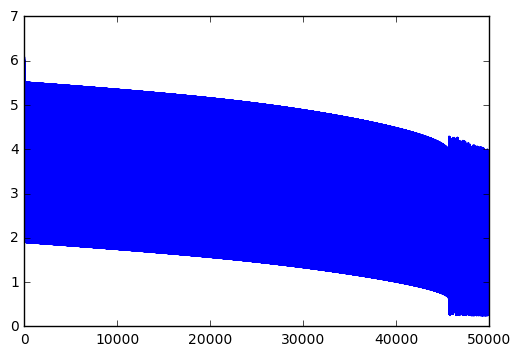

In [65]:
plt.figure()
plt.plot(np.arange(0, len(j)), j, '-', linewidth=1)
plt.show()

In [66]:
print(np.min(j))

0.23910486704


In [67]:
# Cost: 0.203498
# theta:
#  -25.161272
#  0.206233
#  0.201470

[  38.45755098  101.8278578 ]


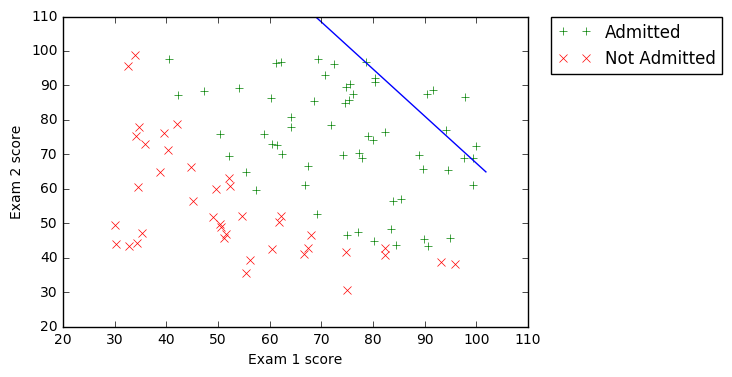

In [68]:
plt.figure()
plt.ylim([20, 110])
plt.xlim([20, 110])
plt.plot(admitted['exam1'].values, admitted['exam2'].values, 'g+', label='Admitted')
plt.plot(not_admitted['exam1'].values, not_admitted['exam2'].values, 'rx', label='Not Admitted')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
x_b = np.array([np.min(admitted['exam1'].values) - 2, np.max(admitted['exam1'].values) + 2])
print(x_b)
y_b = -(1 / t[2, 0]) * (t[1, 0] * x_b + t[0, 0]);
plt.plot(x_b, y_b)
plt.show()

In [69]:
y_b = (-1 / t[2, 0]) * (t[1, 0] * x_b + t[0, 0]);
print(x_b)
print(y_b)

[  38.45755098  101.8278578 ]
[ 151.47169773   64.88883419]
